In [2]:
#perform train test split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('../data/processed/crypto_data_labeled.csv')

In [3]:
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574,0.008859,1,HOLD


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_volatility       801 non-null    float64
 13  30_day_volatility      801 non-null    float64
 14  rsi                    801 non-null    float64
 15  macd  

In [5]:
#drop column 30day volatility
data = data.drop(columns=['30_day_volatility'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_volatility       801 non-null    float64
 13  rsi                    801 non-null    float64
 14  macd                   801 non-null    float64
 15  sma20 

In [7]:
# separate features and labels
x=data.drop(columns=['label'])
y=data['label']

In [8]:
feature_columns = [
    'rsi', 'macd',
    'sma20', 'sma50', 'sma200',
    'bb_high', 'bb_low', 
    'stochastic_oscillator',
    '1_day_return', '7_day_return', '7_day_volatility '
]

In [9]:
x.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label_name
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,HOLD
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,HOLD
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,HOLD
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,HOLD
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574,0.008859,HOLD


In [10]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:

import seaborn as sns

In [12]:
# change date to datetime
data["open_time"] = pd.to_datetime(data["open_time"])
data["close_time"] = pd.to_datetime(data["close_time"])
data["close"] = data["close"].astype(float)
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574,0.008859,1,HOLD


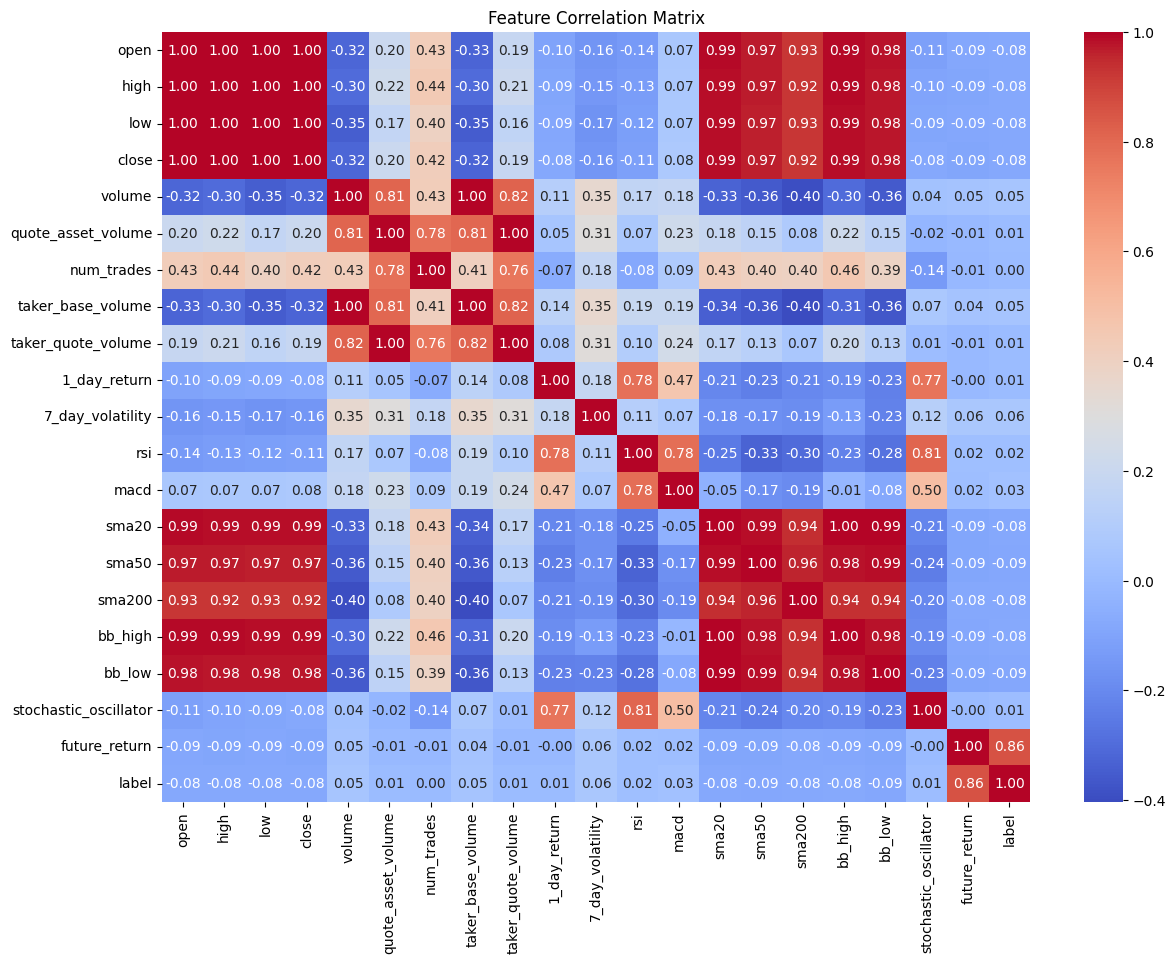

In [13]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


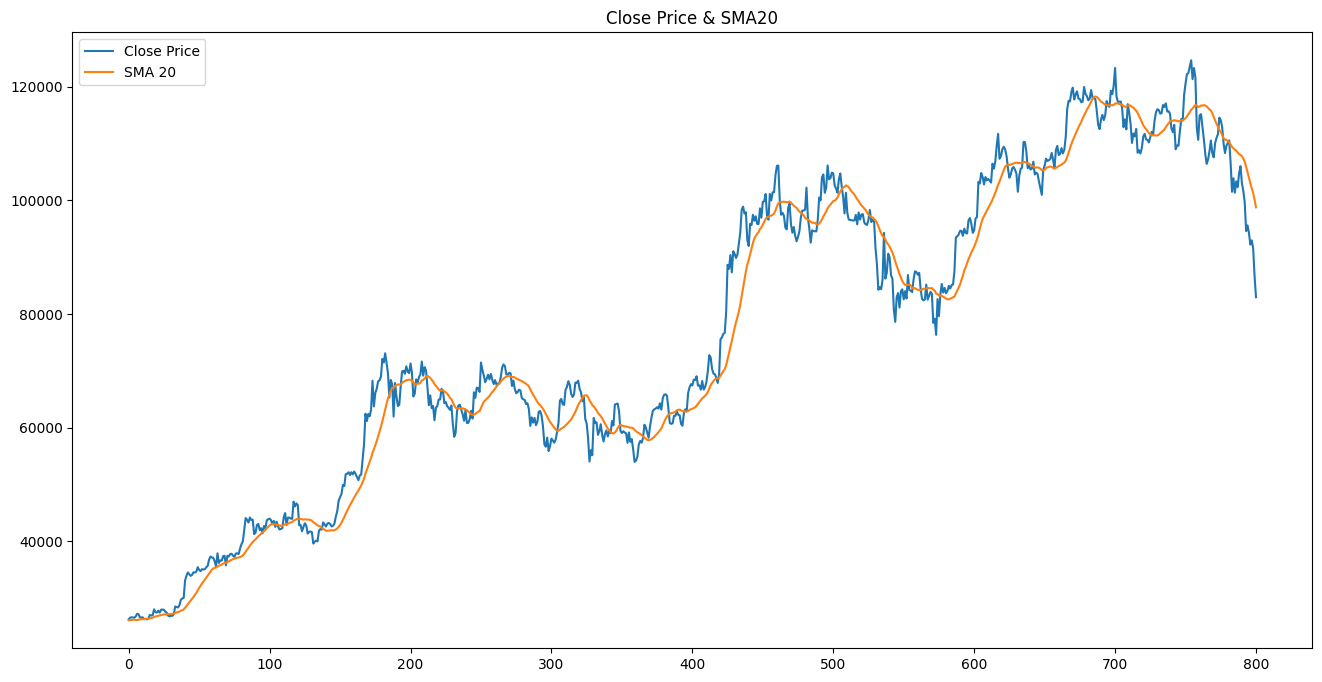

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(data['close'], label='Close Price')
plt.plot(data['sma20'], label='SMA 20')
plt.title("Close Price & SMA20")
plt.legend()
plt.show()
#this shows the close price along with the 20-day simple moving average (SMA20) to visualize trends.


KeyError: '7_day_return'

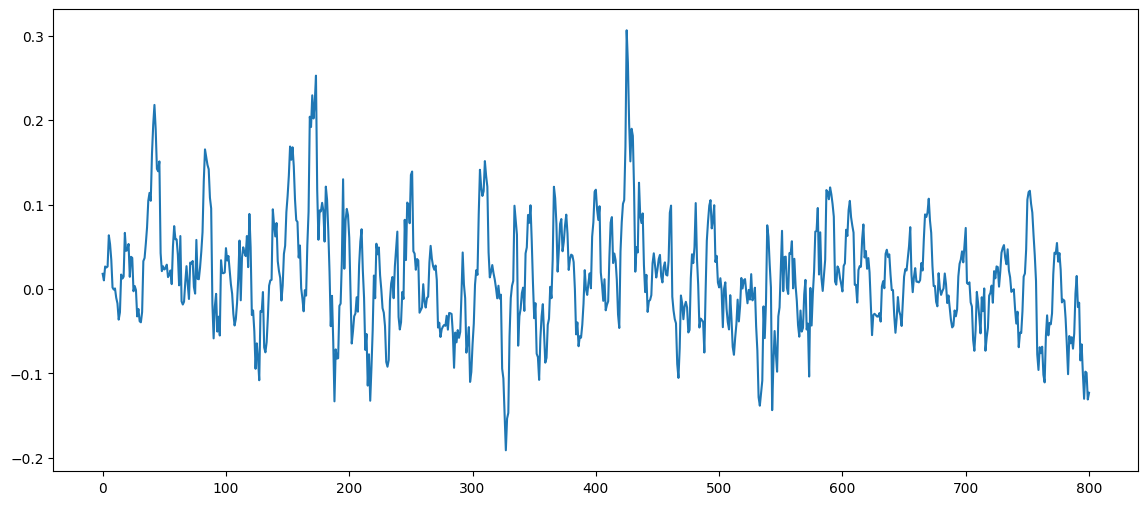

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(data['1_day_return'], label='1-Day Return')
plt.plot(data['7_day_return'], label='7-Day Return')
plt.title("Returns (1-day & 7-day)")
plt.legend()
plt.show()


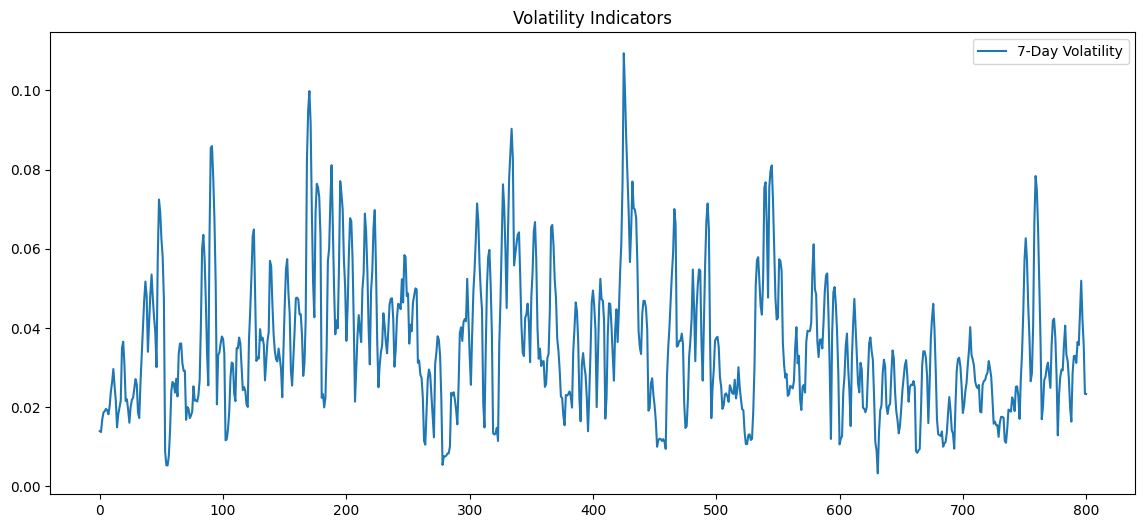

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['7_day_volatility'], label='7-Day Volatility')
plt.title("Volatility Indicators")
plt.legend()
plt.show()


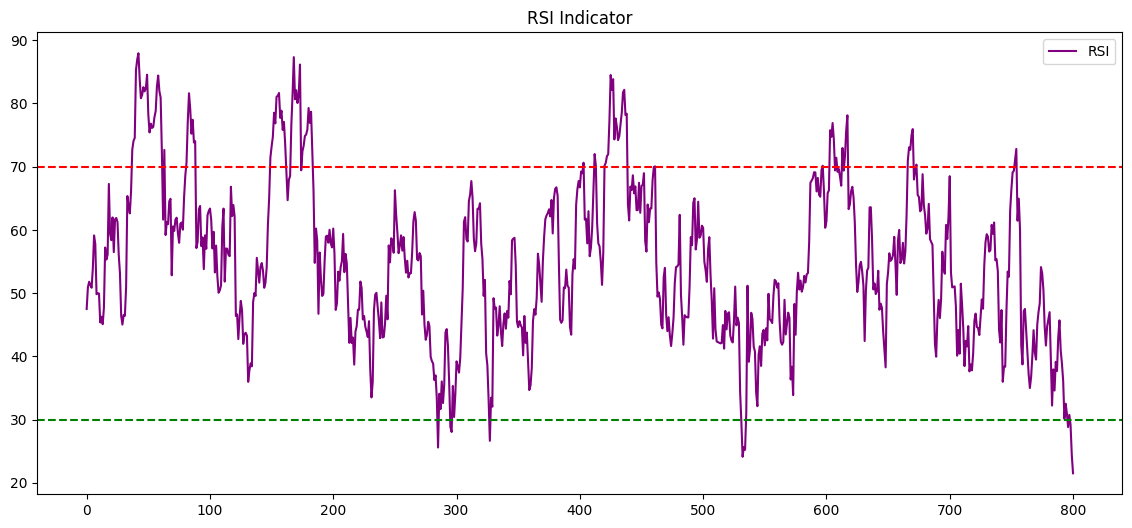

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['rsi'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.legend()
plt.show()


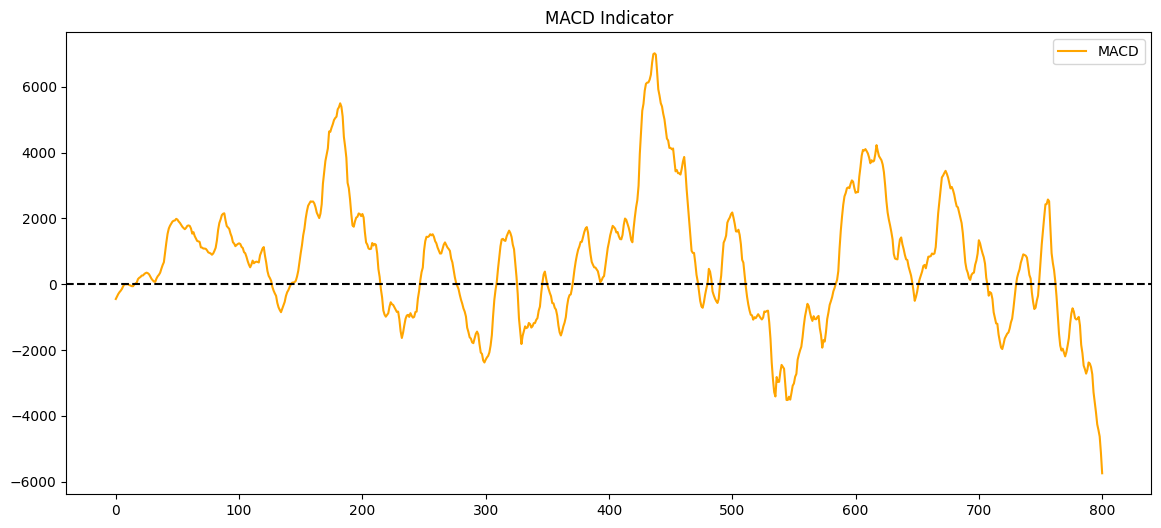

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['macd'], label='MACD', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("MACD Indicator")
plt.legend()
plt.show()


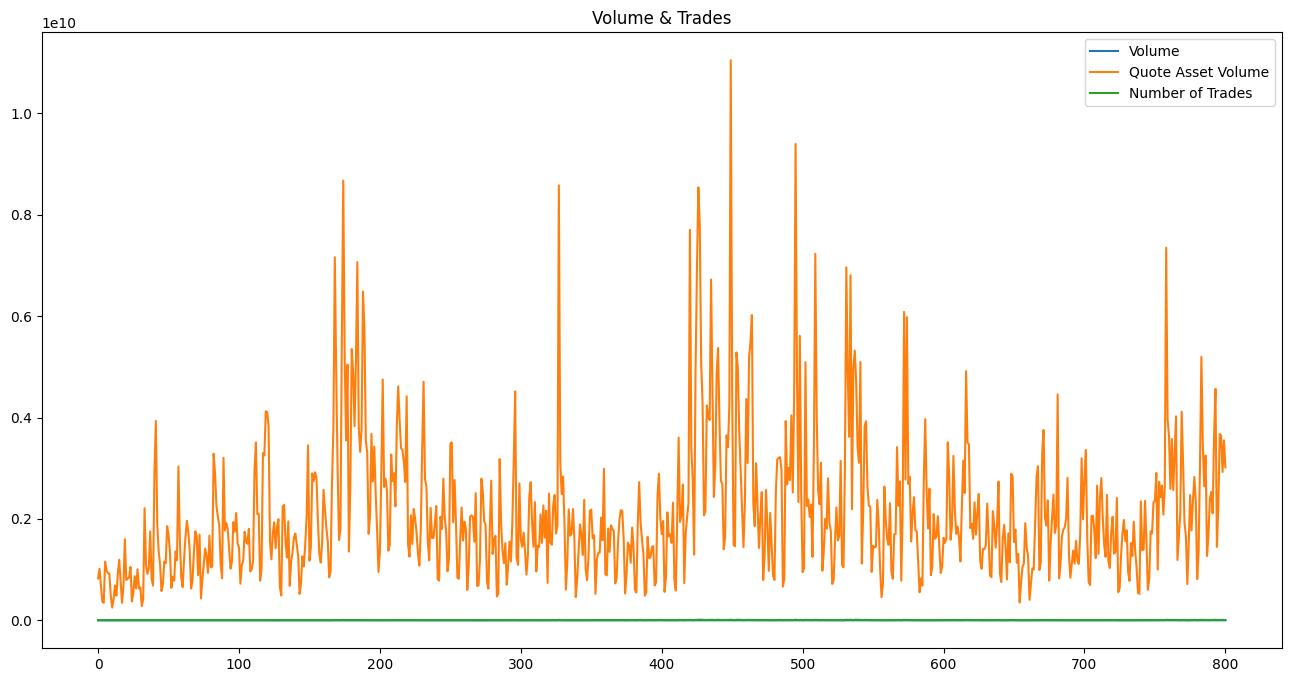

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(data['volume'], label='Volume')
plt.plot(data['quote_asset_volume'], label='Quote Asset Volume')
plt.plot(data['num_trades'], label='Number of Trades')
plt.title("Volume & Trades")
plt.legend()
plt.show()


In [ ]:
%pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Create target variable 'y': 1 if next day's close price is higher, else 0
data['y'] = (data['close'].shift(-1) > data['close']).astype(int)


In [ ]:
#balance our classes before training the model
from sklearn.utils import resample

from sklearn.utils import resample
import pandas as pd

# Keep only the selected feature columns + target
columns_to_keep = [
    'close', 'volume', 'num_trades', '1_day_return',
    '7_day_volatility', 'macd', 'sma20', 
    'bb_high', 'stochastic_oscillator', 'y'
]

#what does the 'y' column represent here?
#represents the target variable for classification, indicating different classes or outcomes we want to predict based on the features.

df = data[columns_to_keep].dropna()

# Split data into majority and minority classes
df_majority = df[df.y == df.y.value_counts().idxmax()]
df_minority = df[df.y == df.y.value_counts().idxmin()]

# Upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,     # sample with replacement
    n_samples=len(df_majority), 
    random_state=42
)

# Combine majority and upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Before balancing:")
print(df['y'].value_counts())

print("\nAfter balancing:")
print(df_balanced['y'].value_counts())


Before balancing:
y
1    417
0    384
Name: count, dtype: int64

After balancing:
y
0    417
1    417
Name: count, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   open_time              801 non-null    datetime64[ns]
 1   open                   801 non-null    float64       
 2   high                   801 non-null    float64       
 3   low                    801 non-null    float64       
 4   close                  801 non-null    float64       
 5   volume                 801 non-null    float64       
 6   close_time             801 non-null    datetime64[ns]
 7   quote_asset_volume     801 non-null    float64       
 8   num_trades             801 non-null    int64         
 9   taker_base_volume      801 non-null    float64       
 10  taker_quote_volume     801 non-null    float64       
 11  1_day_return           801 non-null    float64       
 12  7_day_volatility       801 non-null    float64       
 13  rsi  

In [16]:
# Keep only the selected feature columns 
columns_to_keep = data[[
    'close', 'volume', 'num_trades', '1_day_return',
    '7_day_volatility', 'macd', 'sma20', 
    'bb_high', 'stochastic_oscillator'
]]

In [17]:
#split into X and y(target)
X = columns_to_keep
y = data['label']

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#classification report
from sklearn.metrics import classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1683
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

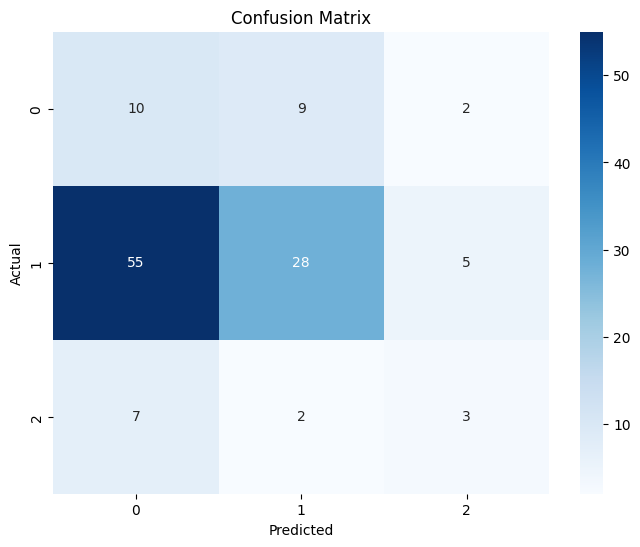

In [25]:
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
%pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[64 20]
 [37 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        84
           1       0.70      0.55      0.62        83

    accuracy                           0.66       167
   macro avg       0.67      0.66      0.65       167
weighted avg       0.67      0.66      0.65       167



In [ ]:
from sklearn.metrics import accuracy_score

[LightGBM] [Info] Number of positive: 295, number of negative: 288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1752
[LightGBM] [Info] Number of data points in the train set: 583, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506003 -> initscore=0.024015
[LightGBM] [Info] Start training from score 0.024015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

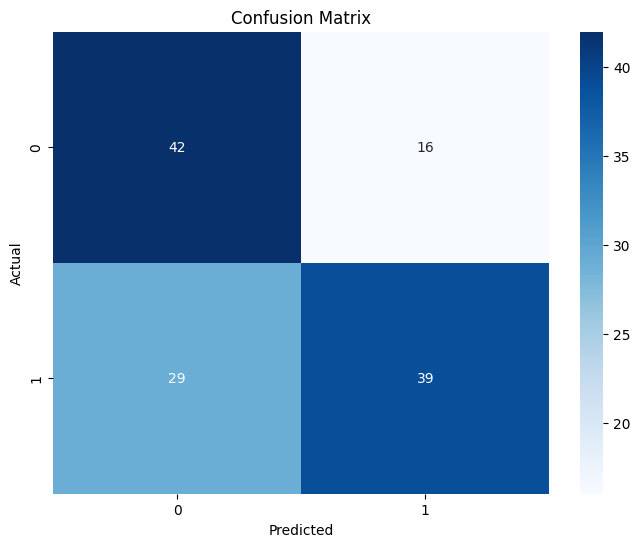

In [ ]:
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# install xgboost in the notebook environment (only needed once)
%pip install xgboost

from xgboost import XGBClassifier 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 5.6 MB/s eta 0:00:13
    --------------------------------------- 1.6/72.0 MB 3.5 MB/s eta 0:00:21
   - -------------------------------------- 1.8/72.0 MB 2.6 MB/s eta 0:00:28
   - -------------------------------------- 2.4/72.0 MB 2.5 MB/s eta 0:00:29
   - -------------------------------------- 2.4/72.0 MB 2.5 MB/s eta 0:00:29
   - -------------------------------------- 2.6/72.0 MB 1.9 MB/s eta 0:00:36
   - -------------------------------------- 2.9/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 3.1/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 3.4/72.0 MB 1.7 MB/s eta 0:00:40
   -- ------------------------------------- 3.7/72.0 MB 1.7 MB/s eta 0:00:42
   -- ------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:26:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.47
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.62      0.33        21
           1       0.74      0.49      0.59        88
           2       0.20      0.08      0.12        12

    accuracy                           0.47       121
   macro avg       0.39      0.40      0.35       121
weighted avg       0.60      0.47      0.50       121



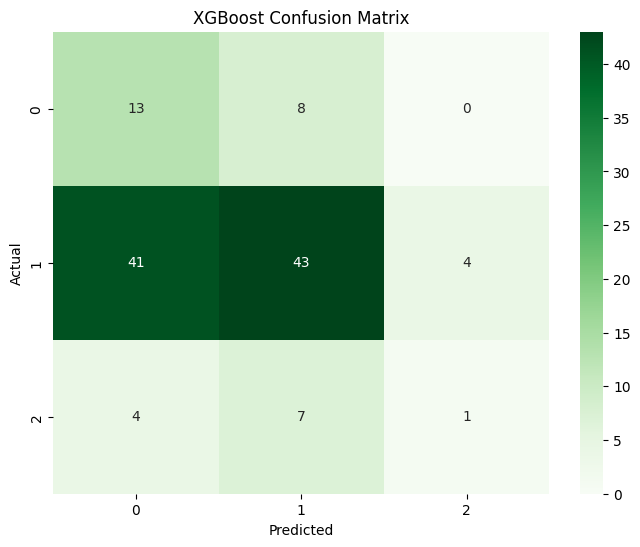

In [29]:
#testing the model with X-G BOOST
#train model  xgboost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)  
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [30]:
#testing the model with  catboost
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 4.8 MB/s eta 0:00:22
    --------------------------------------- 1.3/102.4 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.6/102.4 MB 2.3 MB/s eta 0:00:44
    --------------------------------------- 2.4/102.4 MB 3.1 MB/s eta 0:00:33
   - -------------------------------------- 2.6/102.4 MB 2.4 MB/s eta 0:00:43
   - -------------------------------------- 3.1/102.4 MB 2.5 MB/s eta 0:00:40
   - -------------------------------------- 3.4/102.4 MB 2.3 MB/s eta 0:00:44
   - -------------------------------------- 3.9/102.4 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 4.2/102.4 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 4.5/102.4 MB 2.1 MB/s eta 0:00:46



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


CatBoost Test Accuracy: 0.55

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.24      0.19        21
           1       0.70      0.68      0.69        88
           2       0.33      0.08      0.13        12

    accuracy                           0.55       121
   macro avg       0.40      0.33      0.34       121
weighted avg       0.57      0.55      0.55       121



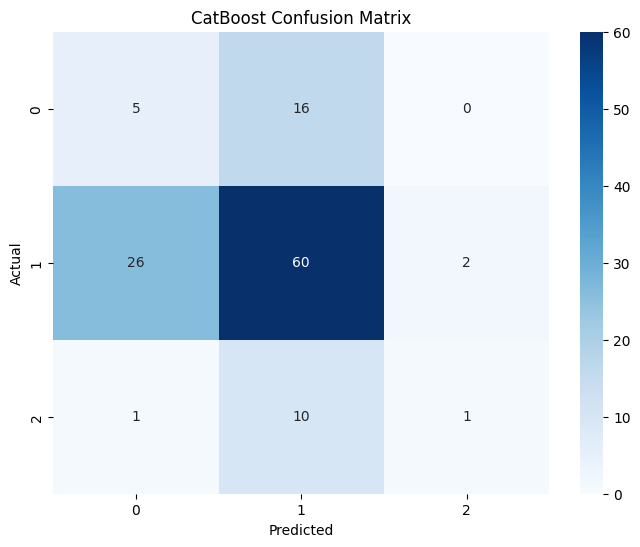

In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Train CatBoost Classifier
# -----------------------------
# Use MultiClass loss since the target has more than 2 classes (0, 1, 2)
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    random_seed=42,
    verbose=0       # set to 100 if you want logs
)

# Ensure labels are integer typed
y_train = y_train.astype(int)
y_test = y_test.astype(int)

cat_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred_cat = cat_model.predict(X_test)
# flatten output to 1D array in case it's returned as column vectors
y_pred_cat = np.ravel(y_pred_cat).astype(int)

# -----------------------------
# Evaluation
# -----------------------------
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Test Accuracy: {accuracy_cat:.2f}")

print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

# -----------------------------
# Confusion Matrix Plot
# -----------------------------
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


Logistic Regression Test Accuracy: 0.72

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.72      0.99      0.84        88
           2       0.00      0.00      0.00        12

    accuracy                           0.72       121
   macro avg       0.24      0.33      0.28       121
weighted avg       0.53      0.72      0.61       121



C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificatio

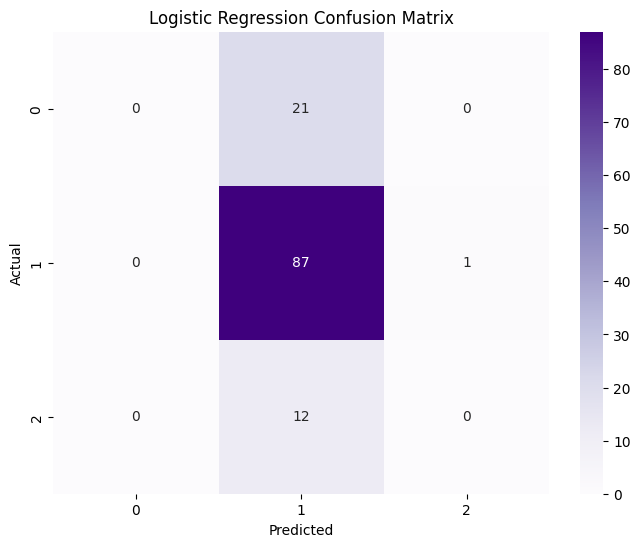

In [35]:
#lets do it using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Scale the features (VERY important for LR)
# ----------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# Train Logistic Regression
# ----------------------------------------------------
log_model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

log_model.fit(X_train_scaled, y_train)

# ----------------------------------------------------
# Predictions
# ----------------------------------------------------
y_pred_log = log_model.predict(X_test_scaled)

# ----------------------------------------------------
# Evaluation
# ----------------------------------------------------
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Test Accuracy: {accuracy_log:.2f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# ----------------------------------------------------
# Confusion Matrix
# ----------------------------------------------------
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [38]:
#install from tensorflow.keras.models import Sequential from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.9 MB 3.6 MB/s eta 0:01:33
   ---------------------------------------- 1.6/331.9 MB 2.7 MB/s eta 0:02:03
   ---------------------------------------- 1.6/331.9 MB 2.7 MB/s eta 0:02:03
   ---------------------------------------- 2.4/331.9 MB 2.6 MB/s eta 0:02:08
   ---------------------------------------- 2.6/331.9 MB 2.3 MB/s eta 0:

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\fault_injection\\fault_injection_service_config_parser.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


DATA PREPARATION FOR LSTM/GRU
X_train shape: (560, 9)
X_test shape: (121, 9)

Reshaped X_train_seq: (560, 1, 9)
Reshaped X_test_seq: (121, 1, 9)

Number of classes: 3
Classes: [0 1 2]
Multi-class classification detected

Model Configuration:
Input size: 9
Sequence length: 1
Number of classes: 3
Selected: LSTM Model
Using device: cpu

Training LSTM model...
--------------------------------------------------
Epoch [5/50], Train Loss: 1.0151, Train Acc: 53.39%, Val Loss: 1.0914, Val Acc: 41.32%
Epoch [10/50], Train Loss: 0.9879, Train Acc: 54.46%, Val Loss: 1.0002, Val Acc: 55.37%
Epoch [15/50], Train Loss: 0.9620, Train Acc: 57.68%, Val Loss: 0.9653, Val Acc: 57.85%
Epoch [20/50], Train Loss: 0.9546, Train Acc: 59.46%, Val Loss: 0.8840, Val Acc: 68.60%
Epoch [25/50], Train Loss: 0.9381, Train Acc: 60.36%, Val Loss: 0.8771, Val Acc: 68.60%
Epoch [30/50], Train Loss: 0.9375, Train Acc: 60.89%, Val Loss: 0.8567, Val Acc: 69.42%
Epoch [35/50], Train Loss: 0.9311, Train Acc: 61.43%, Val Loss:

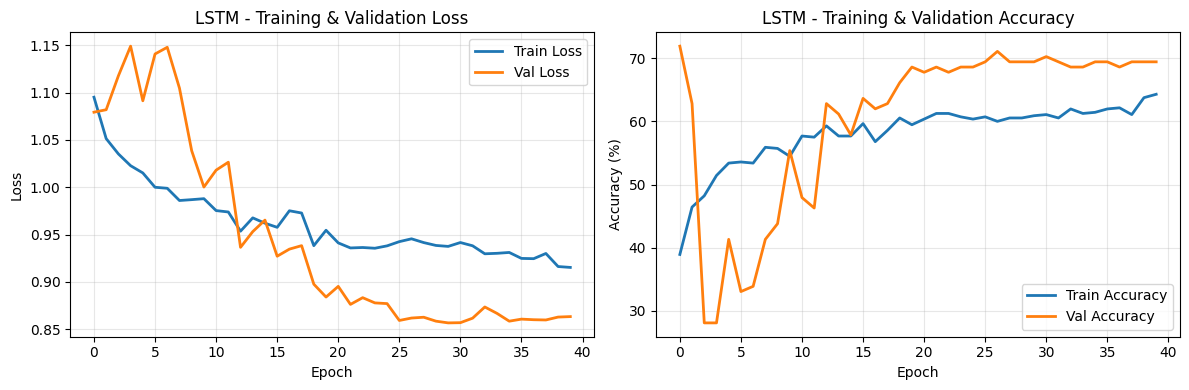

LSTM MODEL EVALUATION

Test Accuracy: 0.6942

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.74      0.93      0.82        88
           2       0.25      0.17      0.20        12

    accuracy                           0.69       121
   macro avg       0.33      0.37      0.34       121
weighted avg       0.56      0.69      0.62       121



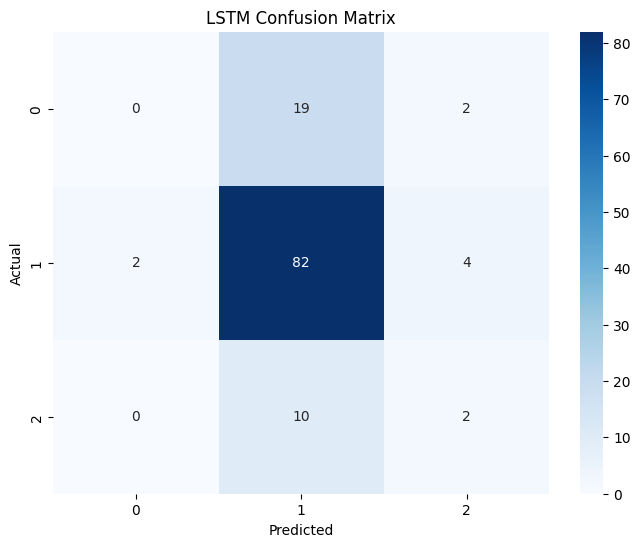


LSTM Training Summary:
Best Validation Accuracy: 71.90%
Final Test Accuracy: 69.42%
Total Epochs Trained: 40


In [52]:
# ----------------------------------------------------
# Import necessary libraries - PyTorch version
# ----------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# ----------------------------------------------------
# Prepare data for LSTM/GRU
# ----------------------------------------------------
print("=" * 50)
print("DATA PREPARATION FOR LSTM/GRU")
print("=" * 50)

# Check data shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM/GRU: (batch_size, sequence_length, features)
# For single timestep (like tabular data)
X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"\nReshaped X_train_seq: {X_train_seq.shape}")
print(f"Reshaped X_test_seq: {X_test_seq.shape}")

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_seq)
X_test_tensor = torch.FloatTensor(X_test_seq)
y_train_tensor = torch.FloatTensor(y_train.values if hasattr(y_train, 'values') else y_train)
y_test_tensor = torch.FloatTensor(y_test.values if hasattr(y_test, 'values') else y_test)

# Check if binary or multi-class
num_classes = len(np.unique(y_train))
print(f"\nNumber of classes: {num_classes}")
print(f"Classes: {np.unique(y_train)}")

# For binary classification
if num_classes == 2:
    y_train_tensor = y_train_tensor.view(-1, 1)
    y_test_tensor = y_test_tensor.view(-1, 1)
    print("Binary classification detected")
else:
    # For multi-class, convert to one-hot encoding
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    y_train_tensor = torch.LongTensor(y_train_encoded)
    y_test_tensor = torch.LongTensor(y_test_encoded)
    print("Multi-class classification detected")

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ----------------------------------------------------
# Define LSTM Model
# ----------------------------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, num_classes=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
        # Batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        
        # Fully connected layer
        if num_classes == 2:
            self.fc = nn.Linear(hidden_size, 1)
            self.output_activation = nn.Sigmoid()
        else:
            self.fc = nn.Linear(hidden_size, num_classes)
            self.output_activation = nn.Softmax(dim=1)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                nn.init.constant_(param.data, 0)
        
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.constant_(self.fc.bias, 0)
    
    def forward(self, x):
        # LSTM layer
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step
        lstm_out = lstm_out[:, -1, :]
        
        # Apply dropout and batch normalization
        lstm_out = self.dropout(lstm_out)
        lstm_out = self.batch_norm(lstm_out)
        
        # Fully connected layer
        out = self.fc(lstm_out)
        
        # Output activation
        out = self.output_activation(out)
        
        return out

# ----------------------------------------------------
# Define GRU Model (Simpler alternative)
# ----------------------------------------------------
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, num_classes=2, dropout=0.3):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # GRU layer (simpler than LSTM)
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        self.dropout = nn.Dropout(dropout)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        
        if num_classes == 2:
            self.fc = nn.Linear(hidden_size, 1)
            self.output_activation = nn.Sigmoid()
        else:
            self.fc = nn.Linear(hidden_size, num_classes)
            self.output_activation = nn.Softmax(dim=1)
    
    def forward(self, x):
        gru_out, _ = self.gru(x)
        gru_out = gru_out[:, -1, :]
        gru_out = self.dropout(gru_out)
        gru_out = self.batch_norm(gru_out)
        out = self.fc(gru_out)
        out = self.output_activation(out)
        return out

# ----------------------------------------------------
# Select and initialize model
# ----------------------------------------------------
input_size = X_train_seq.shape[2]  # Number of features
sequence_length = X_train_seq.shape[1]  # Sequence length

print(f"\nModel Configuration:")
print(f"Input size: {input_size}")
print(f"Sequence length: {sequence_length}")
print(f"Number of classes: {num_classes}")

# Choose model type
model_type = 'LSTM'  # Change to 'GRU' for GRU model

if model_type == 'LSTM':
    model = LSTMModel(input_size=input_size, num_classes=num_classes)
    print("Selected: LSTM Model")
else:
    model = GRUModel(input_size=input_size, num_classes=num_classes)
    print("Selected: GRU Model")

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"Using device: {device}")

# ----------------------------------------------------
# Define loss function and optimizer
# ----------------------------------------------------
if num_classes == 2:
    criterion = nn.BCELoss()  # Binary Cross Entropy
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# ----------------------------------------------------
# Training function
# ----------------------------------------------------
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 10
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            
            if num_classes == 2:
                loss = criterion(outputs, batch_y)
                predictions = (outputs > 0.5).float()
            else:
                loss = criterion(outputs, batch_y)
                _, predictions = torch.max(outputs, 1)
            
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_total += batch_y.size(0)
            
            if num_classes == 2:
                train_correct += (predictions == batch_y).sum().item()
            else:
                train_correct += (predictions == batch_y).sum().item()
        
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(train_loss / len(train_loader))
        train_accs.append(train_accuracy)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                
                if num_classes == 2:
                    loss = criterion(outputs, batch_y)
                    predictions = (outputs > 0.5).float()
                else:
                    loss = criterion(outputs, batch_y)
                    _, predictions = torch.max(outputs, 1)
                
                val_loss += loss.item()
                val_total += batch_y.size(0)
                
                if num_classes == 2:
                    val_correct += (predictions == batch_y).sum().item()
                else:
                    val_correct += (predictions == batch_y).sum().item()
        
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(val_loss / len(test_loader))
        val_accs.append(val_accuracy)
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), f'best_{model_type}_model.pth')
        else:
            patience_counter += 1
        
        # Print progress
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_losses[-1]:.4f}, '
                  f'Train Acc: {train_accuracy:.2f}%, '
                  f'Val Loss: {val_losses[-1]:.4f}, '
                  f'Val Acc: {val_accuracy:.2f}%')
        
        if patience_counter >= patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            break
    
    return train_losses, val_losses, train_accs, val_accs

# ----------------------------------------------------
# Train the model
# ----------------------------------------------------
print(f"\nTraining {model_type} model...")
print("-" * 50)

train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=50
)

# Load best model
model.load_state_dict(torch.load(f'best_{model_type}_model.pth'))

# ----------------------------------------------------
# Plot training history
# ----------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
axes[0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0].plot(val_losses, label='Val Loss', linewidth=2)
axes[0].set_title(f'{model_type} - Training & Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(train_accs, label='Train Accuracy', linewidth=2)
axes[1].plot(val_accs, label='Val Accuracy', linewidth=2)
axes[1].set_title(f'{model_type} - Training & Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# Make predictions
# ----------------------------------------------------
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        
        if num_classes == 2:
            predictions = (outputs > 0.5).float()
            predictions = predictions.cpu().numpy().flatten()
            labels = batch_y.cpu().numpy().flatten()
        else:
            _, predictions = torch.max(outputs, 1)
            predictions = predictions.cpu().numpy()
            labels = batch_y.cpu().numpy()
        
        all_predictions.extend(predictions)
        all_labels.extend(labels)

# ----------------------------------------------------
# Evaluation
# ----------------------------------------------------
print("=" * 50)
print(f"{model_type} MODEL EVALUATION")
print("=" * 50)

accuracy = accuracy_score(all_labels, all_predictions)
print(f"\nTest Accuracy: {accuracy:.4f}")

print(f"\nClassification Report:")
print(classification_report(all_labels, all_predictions))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{model_type} Confusion Matrix")
plt.show()

# ----------------------------------------------------
# Print final results
# ----------------------------------------------------
print(f"\n{model_type} Training Summary:")
print(f"Best Validation Accuracy: {max(val_accs):.2f}%")
print(f"Final Test Accuracy: {accuracy*100:.2f}%")
print(f"Total Epochs Trained: {len(train_losses)}")